# Analyzing data on GDP and life expectancy from the World Health Organization and the World Bank

#### Imports and reading the data

* Has life expectancy increased over time in the six nations?
* Has GDP increased over time in the six nations?
* Is there a correlation between GDP and life expectancy of a country?
* What is the average life expectancy in these nations?
* What is the distribution of that life expectancy?

**Question I'd be answering in this project**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
all_data = pd.read_csv('all_data.csv')

# Data understanding
* dataframe shape
* head and tail
* dtype
* describe

In [3]:
all_data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
all_data.shape

(96, 4)

**From data we could tell that the data is from year 2000 and 2015 and we have a total of 96 rows and 4 columns**

In [5]:
all_data.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


* The data used in the analysis if from the year 2000 to 2015


In [6]:
# Data cleaning - cahnging the name for life expectancy


all_data = all_data.rename(columns={'Life expectancy at birth (years)': 'leby'})


#### Distribution of life expectancy


### The distribution of life expectancy is negatively skewed

* The peak from the graph suggests that a significant number of nations achieve relatively high life expectancies

* There are fewer countries with life expectancies below 70 years
* The graph shuft toward higher life expectancy indicating that there's progress over time

C:\Users\omoke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

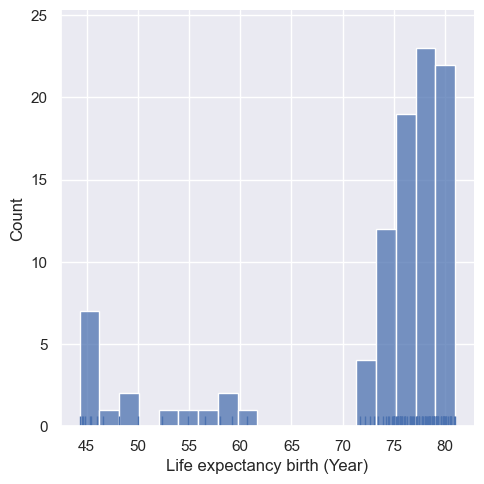

In [40]:
plt.figure(figsize=(8, 6))
sns.set_theme()
# sns.color_palette("Paired")
sns.displot(data=all_data, x = 'leby', kde=False, rug = True)
plt.xlabel('Life expectancy birth (Year)')
plt.show()

#### Distribution of GDP

#### The distribution of GDP is positively skewed
* Majority of countries have a GDP within the range on approximately `0 to 0.25 trillon dollars`
* This peak suggest that many countries fall into lower GDP category.
* There are fewer countries with very high GDps

C:\Users\omoke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

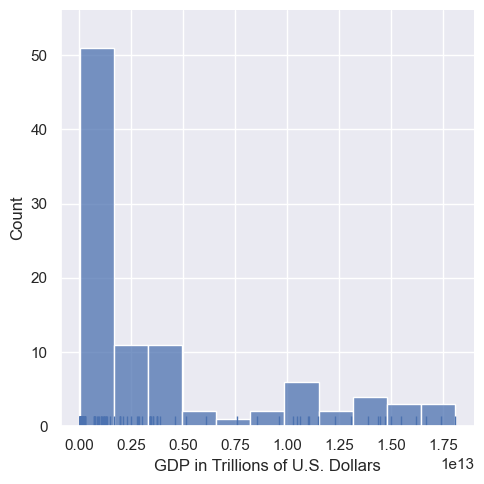

In [43]:
plt.figure(figsize=(8, 6))
sns.displot(data=all_data, x = 'GDP', kde=False, rug = True)
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.show()

In [7]:
# create a new table of the average(mean) life expectancy and GDP


all_data_mean = all_data.groupby('Country')[['leby', 'GDP']].mean().reset_index()
all_data_mean.head()

,Country,leby,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13


#### Average life expectancy in countries
* Zimbabwe is the only country at approximately 50 while other countries is at mid 70

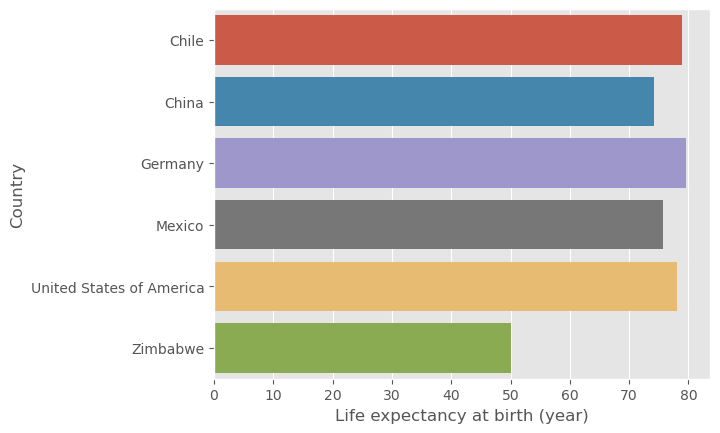

In [8]:
# plot of average life expectancy for each country

sns.barplot(data = all_data_mean, y = 'Country', x = 'leby', orient='h')
plt.xlabel('Life expectancy at birth (year)')
plt.show()

#### Average GDP for countries
* GDP in Zimbabwe is very low same as Chile
* USA have the highiest GDP
* And other countries seems to be raletively close

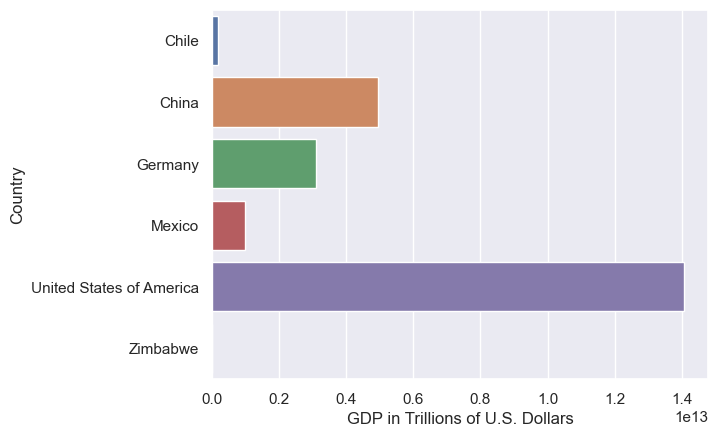

In [61]:
# plot of the average GDP for each country

sns.barplot(data = all_data_mean, y = 'Country', x = 'GDP', orient='h')
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.show()

### Using a violin plot to get the distribution of the life expectancy and GDP

#### Distribution of GDP and life expectancies in this countries
* The range of Zimbabwe, mexico and chile is short 
* The range on china and USA are relatively wide 
* In the LEABY plot, many of the countries have shorter ranges except for Zimbabwe which has a range spanning from the high 30s to the high 60s

Text(0.5, 0, 'Life expectancy at birth (years)')

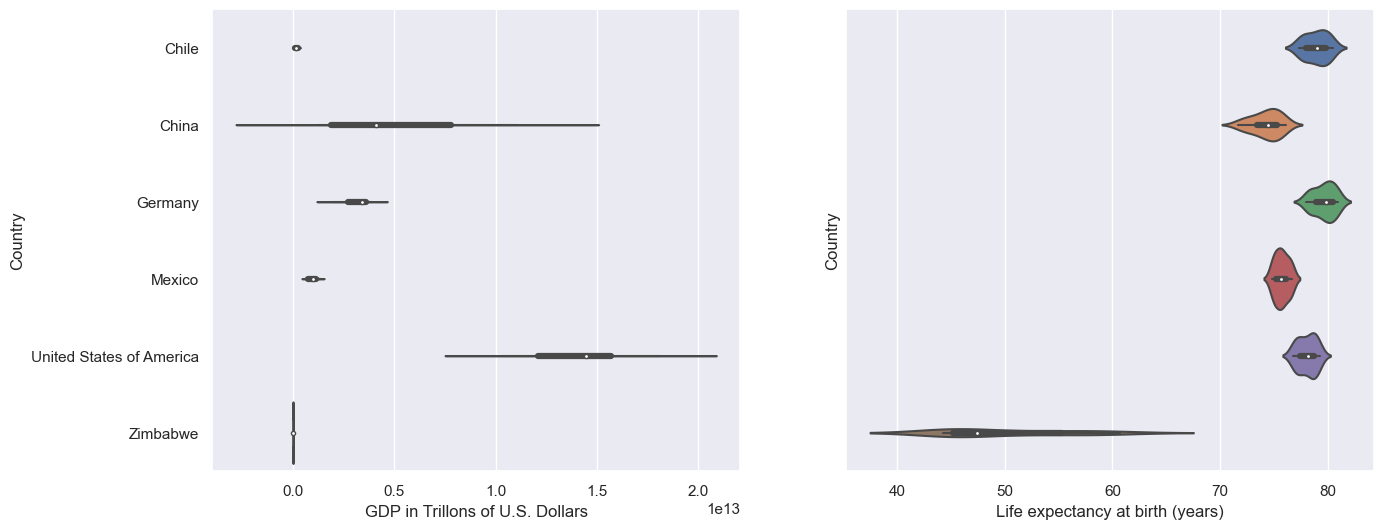

In [67]:
# plotting a violinplot

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 6))
axes[0] = sns.violinplot(ax=axes[0], x = all_data['GDP'], y = all_data['Country'])
axes[0].set_xlabel('GDP in Trillons of U.S. Dollars')
axes[1] = sns.violinplot(ax=axes[1], x = all_data['leby'], y = all_data['Country'])
axes[1].set_xlabel('Life expectancy at birth (years)')

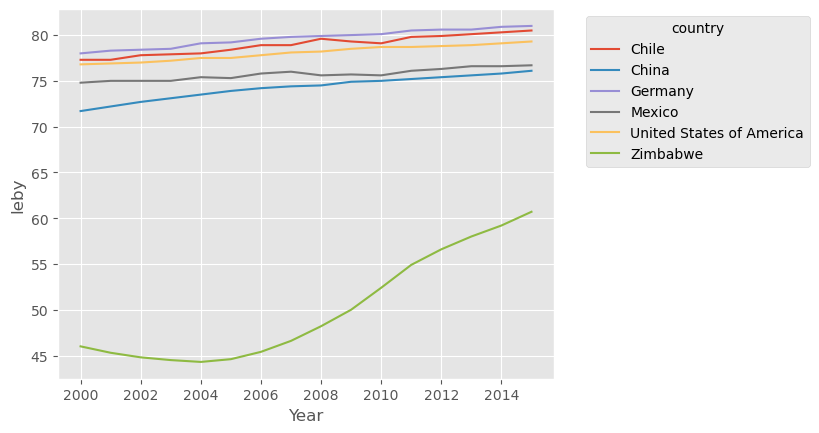

In [9]:
sns.lineplot(data=all_data, x = 'Year', y='leby', hue="Country")
plt.legend(title="country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

C:\Users\omoke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


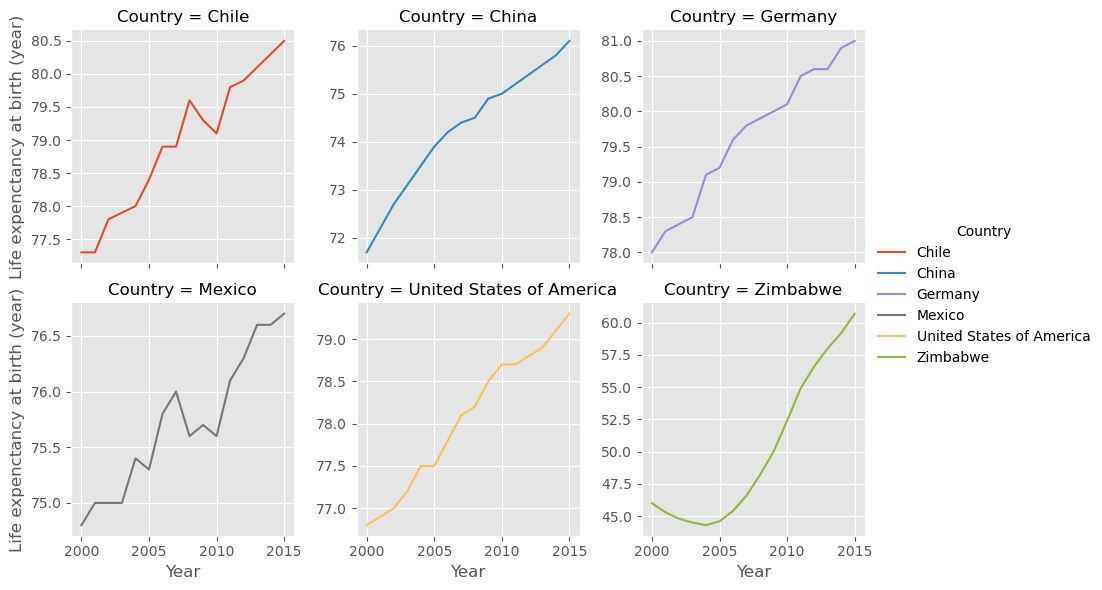

In [10]:
lebygraph = sns.FacetGrid(all_data, col= 'Country', col_wrap= 3, hue = "Country", sharey = False)
lebygraph.map(sns.lineplot, 'Year', 'leby')\
            .add_legend()\
            .set_axis_labels('Year', "Life expenctancy at birth (year)")



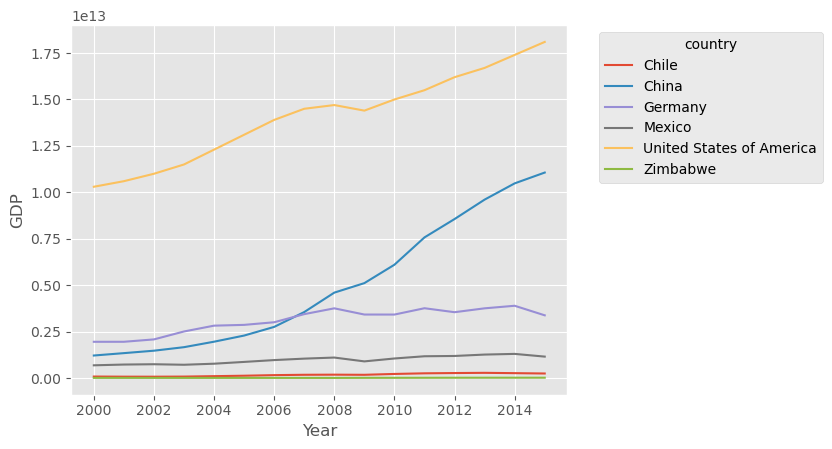

In [11]:
sns.lineplot(data=all_data, x = 'Year', y='GDP', hue="Country")
plt.legend(title="country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

C:\Users\omoke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


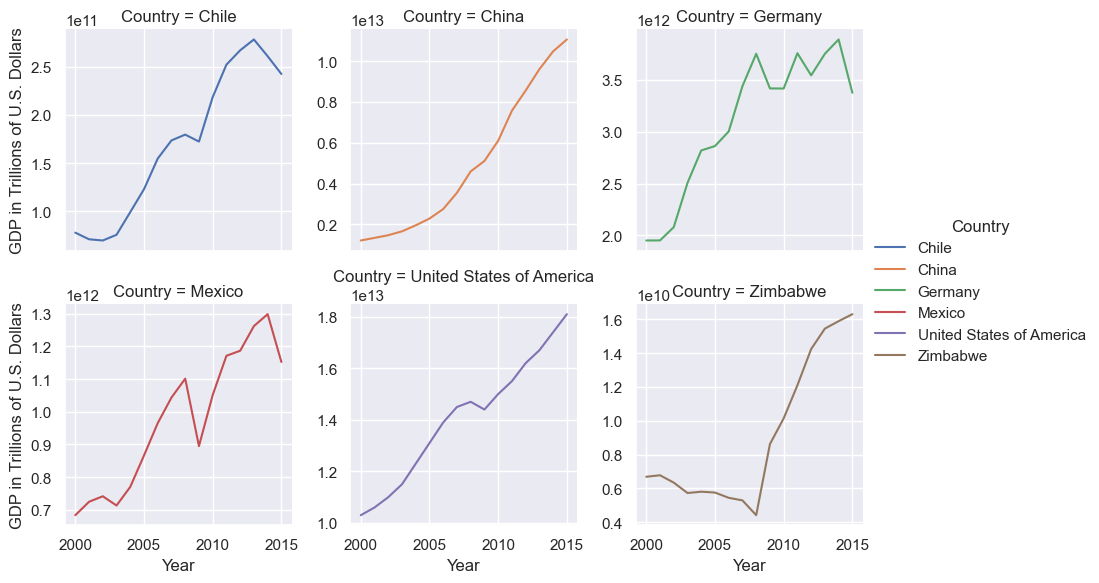

In [100]:
GDPgraph = sns.FacetGrid(all_data, col= 'Country', col_wrap= 3, hue = "Country", sharey = False)
GDPgraph.map(sns.lineplot, 'Year', 'GDP')\
            .add_legend()\
            .set_axis_labels('Year', "GDP in Trillions of U.S. Dollars")

In [74]:
# Group by 'Country' and 'Year' and calculate the mean life expectancy
mean_life_expectancy = all_data.groupby(['Country', 'Year', 'GDP'])['leby'].mean()


# Convert the resulting Series to a DataFrame
mean_life_expectancy_df = mean_life_expectancy.reset_index()

# Display the new DataFrame
# mean_life_expectancy_df



# Plot the transposed data
# transposed_data.plot(figsize=(10, 6))

# # Add labels and title
# plt.xlabel('Year')
# plt.ylabel('Mean leby')
# plt.title('Mean leby Over Time for Each Country')

# # Show the plot
# plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.show()

# lebygraph = sns.FacetGrid(mean_life_expectancy_df, col= 'Country', col_wrap= 3, hue = "Country", sharey = False)
# lebygraph.map(sns.lineplot, 'Year', 'GDP')\
#             .add_legend()\
#             .set_axis_labels('Year', "Life expenctancy at birth (year)")

#### Using a scatterplot to see the correlation between GDP and life expectancy 

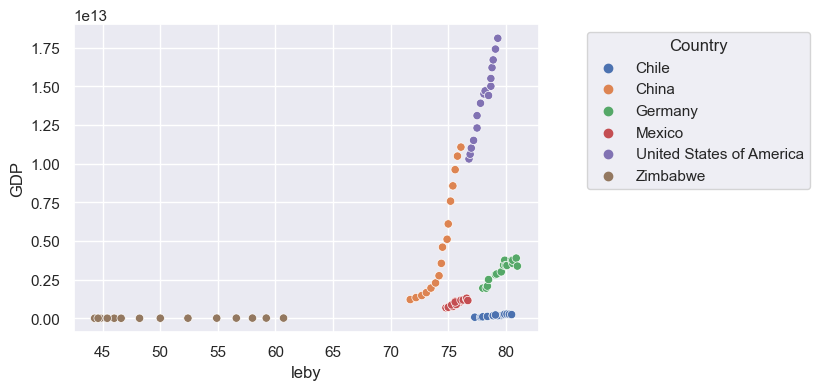

In [89]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data = all_data, x = 'leby', y = 'GDP', hue='Country')
plt.legend(title = 'Country', bbox_to_anchor = (1.6, 1), loc = 'upper right', ncol=1)
plt.grid(True)
plt.show()

C:\Users\omoke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


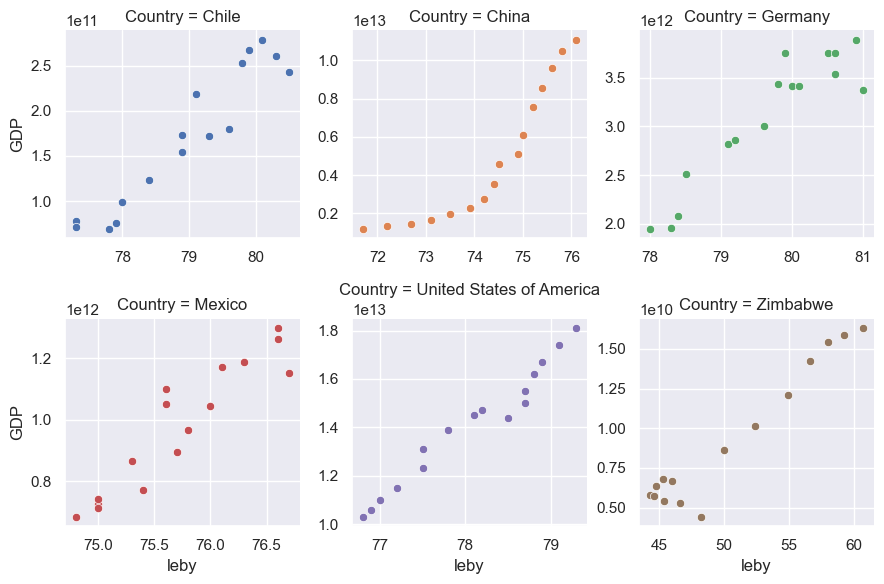

In [97]:
scatter_gdp_leby = sns.FacetGrid(data = all_data, col = "Country", col_wrap = 3, hue = 'Country', sharey=False, sharex=False)
scatter_gdp_leby.map(sns.scatterplot, 'leby', 'GDP')

# Conclusion


This project was able to make quite a few data visualizations with the data even though there were only 96 rows and 4 columns. 

The project was also able to answer some of the questions posed in the beginning:

- Has life expectancy increased over time in the six nations?
    - Yes with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
- What is the distribution of that life expectancy?
    - the life expectancy had a left skew, or most of the observations were on the right side.